In [1]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [2]:
COL_NAMES = ['target','ids','date','flag','user','text']
df = pd.read_csv('../Datasets/training.1600000.processed.noemoticon.csv', names = COL_NAMES)

In [3]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df = df[['target', 'text']]

In [5]:
df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [6]:
df['target'].unique()

array([0, 4], dtype=int64)

In [7]:
df['target'].replace({4:1}, inplace = True)

In [8]:
df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [9]:
df['target'].value_counts()

0    800000
1    800000
Name: target, dtype: int64

### a value of 1 in the target column : positive sentiment, otherwise it is negative

In [10]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
df.shape

(1600000, 2)

In [12]:
pos_filt = df['target']==1
neg_filt = df['target']==0

In [13]:
df_pos = df.loc[pos_filt]
df_neg = df.loc[neg_filt]

In [14]:
df_pos.head()

,target,text
800000,1,I LOVE @Health4UandPets u guys r the best!!
800001,1,im meeting up with one of my besties tonight! ...
800002,1,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,1,Being sick can be really cheap when it hurts t...
800004,1,@LovesBrooklyn2 he has that effect on everyone


In [16]:
df_neg.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [17]:
df_pos = df_pos.iloc[0:50000]
df_neg = df_neg.iloc[0:50000]

In [30]:
df = pd.concat([df_pos, df_neg], ignore_index = True)

In [31]:
df.shape

(100000, 2)

In [32]:
df['target'].value_counts()

0    50000
1    50000
Name: target, dtype: int64

In [33]:
df.head()

,target,text
0,1,I LOVE @Health4UandPets u guys r the best!!
1,1,im meeting up with one of my besties tonight! ...
2,1,"@DaRealSunisaKim Thanks for the Twitter add, S..."
3,1,Being sick can be really cheap when it hurts t...
4,1,@LovesBrooklyn2 he has that effect on everyone


In [34]:
df.tail()

,target,text
99995,0,@mileycyrus so i have the same insomnia prob a...
99996,0,20 mintues late for my meeting starting @ 8 h...
99997,0,@kentucky_derby super excited! Are you tweetin...
99998,0,I WANT ANOTHER DAY OFF!!!! To much Sh#t to do...
99999,0,i just jacked up this umbrella cake


In [35]:
df = df.sample(frac=1, random_state = 1).reset_index(drop = True)

In [36]:
df.head()

,target,text
0,1,@AndyTaylorSonic Like the Remixes.. and no dou...
1,0,@PlayForKeeps Totally would if I wasn't suppos...
2,1,Heading out in this Beautiful weather to do ya...
3,0,i feel sick have had a headache and sore thro...
4,0,My MacBook has been at Apple Hospital a week a...


## Preprocessing

In [37]:
from tqdm import tqdm

In [38]:
stemmer = PorterStemmer()

In [39]:
texts = []
for i in tqdm(range(len(df))):
    text = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords.words('english')]
    text = ' '.join(text)
    texts.append(text)

100%|█████████████████████████████████████████████████████████████████████████| 100000/100000 [08:37<00:00, 193.42it/s]


In [40]:
texts

['andytaylorson like remix doubt proper version arriv still like see photo studio setup',
 'playforkeep total would suppos work right mayb anyway',
 'head beauti weather yard work',
 'feel sick headach sore throat sinc yesterday',
 'macbook appl hospit week await hard drive transplant appear shortag suppli',
 'robertthebruc glad hear',
 'record tomorrow woo im wear poker pant woo p p p poker face p p poker face mamamama oo follow',
 'phone keep glow keep think text saw low batteri',
 'teamellen yeah im tri doesnt load',
 'joel hous watch twilight yay',
 'go home leav thestudioo tiredd',
 'ohashliima wish',
 'wait comcast saturday morn suck want go back bed',
 'aunt hospit go visit',
 'jodyg hey beauti long time hear',
 'bfhero back',
 'wonder email aat',
 'look forward tomorrow',
 'hemanshu anyth gener money grim economi',
 'carolynpeck amaz ms peck pleasur follow',
 'jack palahniuk art thesi sound complic cool good luck',
 'hey twitter would make throw inhibit wind',
 'saw caleb littl

In [41]:
cleaned_text = []
for text in tqdm(texts):
    cleaned_text.append(re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text))

100%|██████████████████████████████████████████████████████████████████████| 100000/100000 [00:00<00:00, 235385.65it/s]


In [42]:
cleaned_text

['andytaylorson like remix doubt proper version arriv still like see photo studio setup',
 'playforkeep total would suppos work right mayb anyway',
 'head beauti weather yard work',
 'feel sick headach sore throat sinc yesterday',
 'macbook appl hospit week await hard drive transplant appear shortag suppli',
 'robertthebruc glad hear',
 'record tomorrow woo im wear poker pant woo p p p poker face p p poker face mamamama oo follow',
 'phone keep glow keep think text saw low batteri',
 'teamellen yeah im tri doesnt load',
 'joel hous watch twilight yay',
 'go home leav thestudioo tiredd',
 'ohashliima wish',
 'wait comcast saturday morn suck want go back bed',
 'aunt hospit go visit',
 'jodyg hey beauti long time hear',
 'bfhero back',
 'wonder email aat',
 'look forward tomorrow',
 'hemanshu anyth gener money grim economi',
 'carolynpeck amaz ms peck pleasur follow',
 'jack palahniuk art thesi sound complic cool good luck',
 'hey twitter would make throw inhibit wind',
 'saw caleb littl

In [43]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [44]:
tokenizer = Tokenizer()

In [45]:
tokenizer.fit_on_texts(cleaned_text)

In [46]:
tokenizer.word_index

{'go': 1,
 'get': 2,
 'day': 3,
 'work': 4,
 'good': 5,
 'like': 6,
 'love': 7,
 'today': 8,
 'quot': 9,
 'time': 10,
 'back': 11,
 'http': 12,
 'got': 13,
 'thank': 14,
 'one': 15,
 'want': 16,
 'com': 17,
 'lol': 18,
 'think': 19,
 'know': 20,
 'feel': 21,
 'miss': 22,
 'realli': 23,
 'see': 24,
 'night': 25,
 'im': 26,
 'u': 27,
 'twitter': 28,
 'morn': 29,
 'hope': 30,
 'still': 31,
 'well': 32,
 'amp': 33,
 'need': 34,
 'look': 35,
 'watch': 36,
 'make': 37,
 'new': 38,
 'sleep': 39,
 'home': 40,
 'oh': 41,
 'come': 42,
 'much': 43,
 'great': 44,
 'last': 45,
 'tomorrow': 46,
 'wish': 47,
 'follow': 48,
 'week': 49,
 'wait': 50,
 'fun': 51,
 'tri': 52,
 'nice': 53,
 'would': 54,
 'school': 55,
 'right': 56,
 'thing': 57,
 'haha': 58,
 'bed': 59,
 'sad': 60,
 'bad': 61,
 'happi': 62,
 'way': 63,
 'though': 64,
 'friend': 65,
 'sorri': 66,
 'say': 67,
 'take': 68,
 'start': 69,
 'tweet': 70,
 'tonight': 71,
 'even': 72,
 'better': 73,
 'hour': 74,
 'hate': 75,
 'could': 76,
 'peopl'

In [47]:
len(tokenizer.word_index)

71280

In [48]:
tokenized_sentences = tokenizer.texts_to_sequences(cleaned_text)

In [49]:
tokenized_sentences

[[11123, 6, 2769, 1107, 1897, 838, 731, 31, 6, 24, 340, 927, 2914],
 [22765, 261, 54, 415, 4, 56, 153, 349],
 [114, 170, 149, 1658, 4],
 [21, 95, 348, 491, 530, 237, 185],
 [1412, 808, 839, 49, 1953, 208, 292, 7287, 1223, 11124, 2553],
 [22766, 180, 188],
 [489,
  46,
  815,
  26,
  484,
  1872,
  1327,
  815,
  117,
  117,
  117,
  1872,
  333,
  117,
  117,
  1872,
  333,
  22767,
  2697,
  48],
 [151, 121, 4983, 121, 19, 456, 240, 976, 1024],
 [8099, 79, 26, 52, 636, 540],
 [4237, 145, 36, 708, 142],
 [1, 40, 164, 22768, 8100],
 [22769, 47],
 [50, 4694, 256, 29, 138, 16, 1, 11, 59],
 [1954, 839, 1, 457],
 [22770, 87, 170, 97, 10, 188],
 [8101, 11],
 [173, 401, 14468],
 [35, 215, 46],
 [22771, 257, 1037, 361, 4984, 4459],
 [22772, 169, 1328, 11125, 1462, 48],
 [1108, 11126, 803, 2621, 141, 2995, 128, 5, 234],
 [87, 28, 54, 37, 1090, 22773, 1390],
 [240, 9327, 100, 582, 89, 10, 29],
 [114, 59, 73],
 [51, 1317, 1440, 256, 29, 60, 107],
 [471, 73, 212, 155, 22774, 2, 10, 36, 489, 351, 6

In [50]:
cleaned_text

['andytaylorson like remix doubt proper version arriv still like see photo studio setup',
 'playforkeep total would suppos work right mayb anyway',
 'head beauti weather yard work',
 'feel sick headach sore throat sinc yesterday',
 'macbook appl hospit week await hard drive transplant appear shortag suppli',
 'robertthebruc glad hear',
 'record tomorrow woo im wear poker pant woo p p p poker face p p poker face mamamama oo follow',
 'phone keep glow keep think text saw low batteri',
 'teamellen yeah im tri doesnt load',
 'joel hous watch twilight yay',
 'go home leav thestudioo tiredd',
 'ohashliima wish',
 'wait comcast saturday morn suck want go back bed',
 'aunt hospit go visit',
 'jodyg hey beauti long time hear',
 'bfhero back',
 'wonder email aat',
 'look forward tomorrow',
 'hemanshu anyth gener money grim economi',
 'carolynpeck amaz ms peck pleasur follow',
 'jack palahniuk art thesi sound complic cool good luck',
 'hey twitter would make throw inhibit wind',
 'saw caleb littl

In [51]:
tokenizer.word_index['andytaylorson']

11123

In [52]:
max_len = max([len(sentence) for sentence in tokenized_sentences])

In [53]:
max_len

36

In [54]:
padded_input_sentences = pad_sequences(tokenized_sentences, maxlen=max_len, padding='pre')

In [55]:
padded_input_sentences

array([[    0,     0,     0, ...,   340,   927,  2914],
       [    0,     0,     0, ...,    56,   153,   349],
       [    0,     0,     0, ...,   149,  1658,     4],
       ...,
       [    0,     0,     0, ..., 71279,  7646,  1558],
       [    0,     0,     0, ...,   152,   202,   330],
       [    0,     0,     0, ...,   466,   184,   153]])

In [56]:
y = df['target']

In [57]:
y

0        1
1        0
2        1
3        0
4        0
        ..
99995    0
99996    0
99997    1
99998    0
99999    0
Name: target, Length: 100000, dtype: int64

In [58]:
y.shape

(100000,)

In [59]:
padded_input_sentences.shape

(100000, 36)

In [60]:
padded_input_sentences = padded_input_sentences.reshape(padded_input_sentences.shape[0], padded_input_sentences.shape[1], 1)

In [61]:
padded_input_sentences.shape

(100000, 36, 1)

# LSTM Model

In [62]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

In [63]:
model = Sequential()
model.add(LSTM(100, input_shape = (padded_input_sentences.shape[1], 1)))
model.add(Dense(1, activation = 'sigmoid'))

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

### Training the model

In [66]:
history = model.fit(padded_input_sentences, y, epochs = 5, verbose = 2, shuffle = False, validation_split=0.33)

Epoch 1/5
2094/2094 - 27s - loss: 0.6858 - accuracy: 0.5466 - val_loss: 0.6833 - val_accuracy: 0.5592
Epoch 2/5
2094/2094 - 31s - loss: 0.6800 - accuracy: 0.5654 - val_loss: 0.6756 - val_accuracy: 0.5826
Epoch 3/5
2094/2094 - 30s - loss: 0.6755 - accuracy: 0.5790 - val_loss: 0.6772 - val_accuracy: 0.5739
Epoch 4/5
2094/2094 - 30s - loss: 0.6792 - accuracy: 0.5583 - val_loss: 0.6809 - val_accuracy: 0.5472
Epoch 5/5
2094/2094 - 30s - loss: 0.6760 - accuracy: 0.5716 - val_loss: 0.6787 - val_accuracy: 0.5530


## LSTM with embedding layer

In [67]:
model1 = Sequential()
model1.add(Embedding(len(tokenizer.word_index)+1, 32, input_length = max_len))
model1.add(LSTM(100, input_shape = (padded_input_sentences.shape[1], 1)))
model1.add(Dense(1, activation = 'sigmoid'))

In [68]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 36, 32)            2280992   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 2,334,293
Trainable params: 2,334,293
Non-trainable params: 0
_________________________________________________________________


In [69]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [70]:
history = model1.fit(padded_input_sentences, y, epochs = 5, verbose = 2, shuffle = False, validation_split=0.33)

Epoch 1/5
2094/2094 - 72s - loss: 0.5227 - accuracy: 0.7384 - val_loss: 0.4946 - val_accuracy: 0.7610
Epoch 2/5
2094/2094 - 79s - loss: 0.3920 - accuracy: 0.8245 - val_loss: 0.5428 - val_accuracy: 0.7401
Epoch 3/5
2094/2094 - 74s - loss: 0.2805 - accuracy: 0.8822 - val_loss: 0.6039 - val_accuracy: 0.7291
Epoch 4/5
2094/2094 - 74s - loss: 0.2030 - accuracy: 0.9163 - val_loss: 0.6901 - val_accuracy: 0.7234
Epoch 5/5
2094/2094 - 79s - loss: 0.1537 - accuracy: 0.9359 - val_loss: 0.8085 - val_accuracy: 0.7121


In [71]:
import matplotlib.pyplot as plt

In [72]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

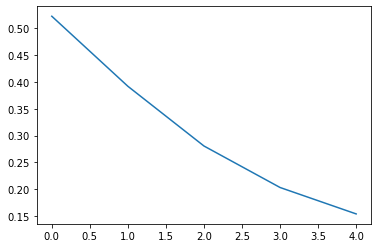

In [73]:
plt.plot(history.history['loss'])

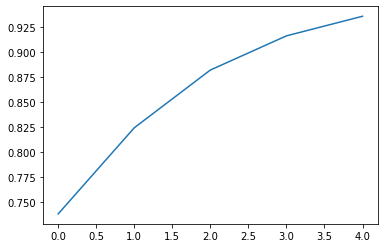

In [74]:
plt.plot(history.history['accuracy'])

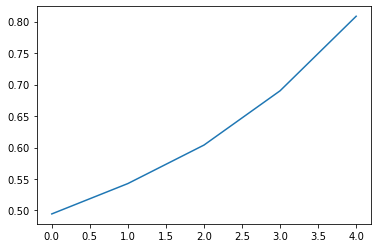

In [75]:
plt.plot(history.history['val_loss'])

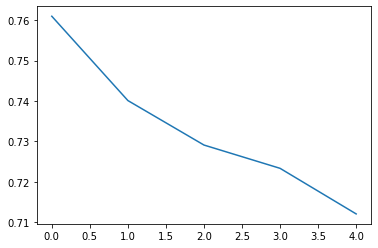

In [76]:
plt.plot(history.history['val_accuracy'])